In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import math

# Load info

In [2]:
T = 0.71
M = 7
RHO = 0.844
equilibrium_time = 0


label =  f'T{T}_N{M}_RHO{RHO}'

N = 4*(M**3)
L = (N / RHO) ** (1/3)

In [3]:
data = pd.read_csv(f'../output_files/{label}_velocities_data.txt', sep=' ', names=['particle', 'time', 'VelocityX', 'VelocityY', 'VelocityZ'])

In [4]:
ilibrium_time = 300
max_lag = 48  # Define the maximum number of time lags to calculate
loops = 100  # Number of initial times to loop over for the VACF calculation

# Sort data once, outside the loop
data.sort_values(by=['particle', 'time'], inplace=True)

# Initialize array to accumulate VACF results
final_vacf = np.zeros(max_lag)

# Main loop for VACF calculation
for initialTime in range(loops):
    # Filter out the data for particles after the equilibrium time + initialTime
    data_ = data[data['time'] >= equilibrium_time + initialTime]

    # Perform groupby outside the inner loop
    grouped = data_.groupby('particle')

    # Initialize array to store VACF for each particle
    vacf_values = np.zeros((len(grouped), max_lag))

    for idx, (particle_id, group) in enumerate(grouped):
        velocities = group[['VelocityX', 'VelocityY', 'VelocityZ']].to_numpy()
        for lag in range(min(len(velocities), max_lag)):
            # Calculate the VACF only up to the number of available steps
            vacf_values[idx, lag] = np.dot(velocities[0], velocities[lag])

    # Compute the mean VACF for this initial time, normalized by the VACF at lag 0
    mean_vacf = np.nanmean(vacf_values, axis=0)
    mean_vacf /= mean_vacf[0]

    # Accumulate the results
    final_vacf += mean_vacf

# Normalize the accumulated VACF by the number of loops
final_vacf /= loops

# Create a DataFrame to store the final VACF results
vacf_df = pd.DataFrame({'time_lag': np.arange(max_lag), 'vacf': final_vacf})


/tmp/ipykernel_25785/1528432021.py:29: RuntimeWarning: Mean of empty slice
  mean_vacf = np.nanmean(vacf_values, axis=0)


<Axes: >

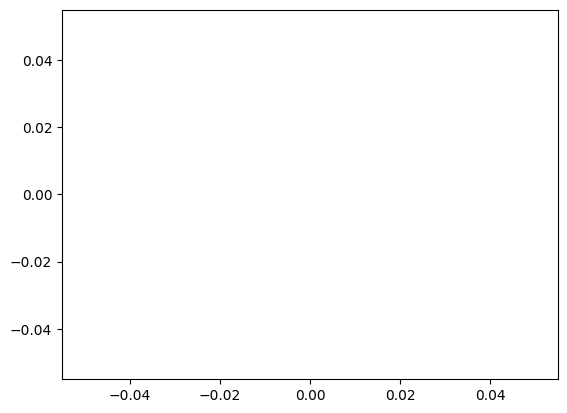

In [5]:
vacf_df.vacf.plot()

In [6]:
vacf_df

,time_lag,vacf
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,NaN
7,7,NaN
8,8,NaN
9,9,NaN
